## Gradient Descent for Linear Regression
### Goal
- Automate the process of optimizing w and b using gradient descent

### Training Set

|   Size (1000 sqft)    |   Price ($1k) |
|-----------------------|---------------|
|   1                   |   300         |
|   2                   |   500         |

Define training set

In [76]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

# features
x_train = np.array([1.0,2.0])
# targets
y_train = np.array([300.0,500.0])

m=x_train.shape[0]

Define cost function

In [77]:
def cost_function(x,y,w,b):
    
    cost=0
    
    for i in range(m):
        f_wb = w*x[i] + b
        cost+=(f_wb - y[i])**2
    
    total_cost=1/(2*m) * cost
    
    return total_cost

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

Calculate derivatives

In [78]:
def compute_derivatives(x,y,w,b):
    
    dj_dw=0
    dj_db=0
    
    for i in range(m):
        f_wb = w*x[i] + b
        
        dj_dwTemp=(f_wb - y[i])*x[i]
        dj_dbTemp=(f_wb - y[i])
        
        dj_dw+=dj_dwTemp
        dj_db+=dj_dbTemp
        
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw, dj_db
        
    

Calculate gradient descent

In [79]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,compute_derivatives):
    
    w=copy.deepcopy(w_in)
    
    # J_history (List): History of cost values
    j_history=[]
    # p_history (list): History of parameters [w,b] 
    p_history=[]
    
    w=w_in
    b=b_in
    
    for i in range(num_iters):
        
        # Find derivatives
        dj_dw, dj_db = compute_derivatives(x,y,w,b)
        
        # Update w and b
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        # Save cost J & (w,b) at each iteration
        if i<10000: #prevent resource exhaustion
            j_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
            
        # Print at every 1000 interval:
        if i % math.ceil(num_iters/100)==0:
            print(f"Iteration {i:5}: Cost {j_history[-1]:0.2e}",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}",
                  f"w: {w:0.3e}, b: {b:0.5e}")
        
    return w,b,j_history,p_history
            
    
    

Initialize Parameters

In [80]:

w_init=0
b_init=0
alpha=1.0e-2
iteration=100000

w_final,b_final,j_hist,p_hist=gradient_descent(x_train,y_train,w_init,b_init,alpha,iteration,cost_function,compute_derivatives)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration     0: Cost 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 6.500e+00, b: 4.00000e+00
Iteration  1000: Cost 3.41e+00 dj_dw: -3.712e-01, dj_db:  6.007e-01 w: 1.949e+02, b: 1.08228e+02
Iteration  2000: Cost 7.93e-01 dj_dw: -1.789e-01, dj_db:  2.895e-01 w: 1.975e+02, b: 1.03966e+02
Iteration  3000: Cost 1.84e-01 dj_dw: -8.625e-02, dj_db:  1.396e-01 w: 1.988e+02, b: 1.01912e+02
Iteration  4000: Cost 4.28e-02 dj_dw: -4.158e-02, dj_db:  6.727e-02 w: 1.994e+02, b: 1.00922e+02
Iteration  5000: Cost 9.95e-03 dj_dw: -2.004e-02, dj_db:  3.243e-02 w: 1.997e+02, b: 1.00444e+02
Iteration  6000: Cost 2.31e-03 dj_dw: -9.660e-03, dj_db:  1.563e-02 w: 1.999e+02, b: 1.00214e+02
Iteration  7000: Cost 5.37e-04 dj_dw: -4.657e-03, dj_db:  7.535e-03 w: 1.999e+02, b: 1.00103e+02
Iteration  8000: Cost 1.25e-04 dj_dw: -2.245e-03, dj_db:  3.632e-03 w: 2.000e+02, b: 1.00050e+02
Iteration  9000: Cost 2.90e-05 dj_dw: -1.082e-03, dj_db:  1.751e-03 w: 2.000e+02, b: 1.00024e+02
Iteration 10000: Cost 6.75e-06

### Cost vs w plot with gradient annotations, b fixed

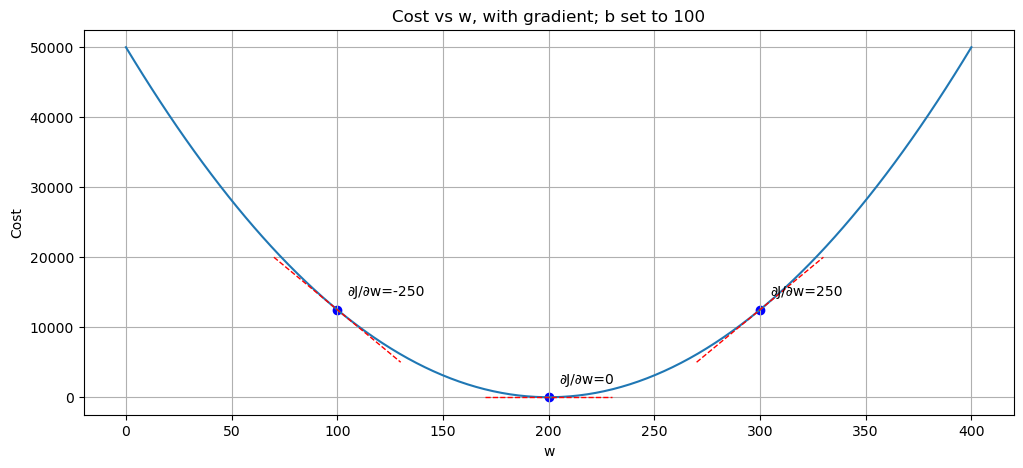

In [81]:
# Generate Cost vs w plot with gradient annotations
w_vals = np.linspace(0, 400, 100)
b_fixed = 100

cost_vals = [cost_function(x_train, y_train, w, b_fixed) for w in w_vals]

plt.figure(figsize=(12, 5))

# Tells matplotlib to divide the canvas into 1 row and 2 columns, and work on the first subplot (left side).
# plt.subplot(1, 2, 1)

plt.plot(w_vals, cost_vals, label='Cost')
plt.xlabel("w")
plt.ylabel("Cost")
plt.title("Cost vs w, with gradient; b set to 100")

# Annotate gradient at 100, 200, 300
for w_annotate in [100, 200, 300]:
    
    # Computes the partial derivative of the cost w.r.t. w at that point using compute_derivatives function.
    dj_dw, _ = compute_derivatives(x_train, y_train, w_annotate, b_fixed)
    
    c = cost_function(x_train, y_train, w_annotate, b_fixed)
    
    plt.scatter(w_annotate, c, color='blue')
    
    # (w_annotate + 5, c + 2000): This specifies the (x, y) coordinates where the annotation text should appear on the plot.
    plt.annotate(f"∂J/∂w={dj_dw:.0f}", (w_annotate+5, c+2000))
    
    # [w_annotate - 30, w_annotate + 30]
    # This defines the x-range for the line to be drawn.
    # It creates a horizontal window of width 60 around the w_annotate point (±30).
    # For example, if w_annotate = 200, this becomes [170, 230].
    # [c - dj_dw * 30, c + dj_dw * 30]
    # This calculates the corresponding y-values for the tangent line, based on the gradient (slope).
    # r--: red colored dashed line
    plt.plot([w_annotate - 30, w_annotate + 30],
             [c - dj_dw * 30, c + dj_dw * 30],
             'r--', linewidth=1)

plt.grid(True)
plt.show()


### Gradient shown in quiver plot
A quiver plot, also known as a vector plot, is a type of 2D plot that uses arrows to represent vectors, displaying both magnitude and direction. These plots are useful for visualizing dynamic processes like flow or wave propagation.

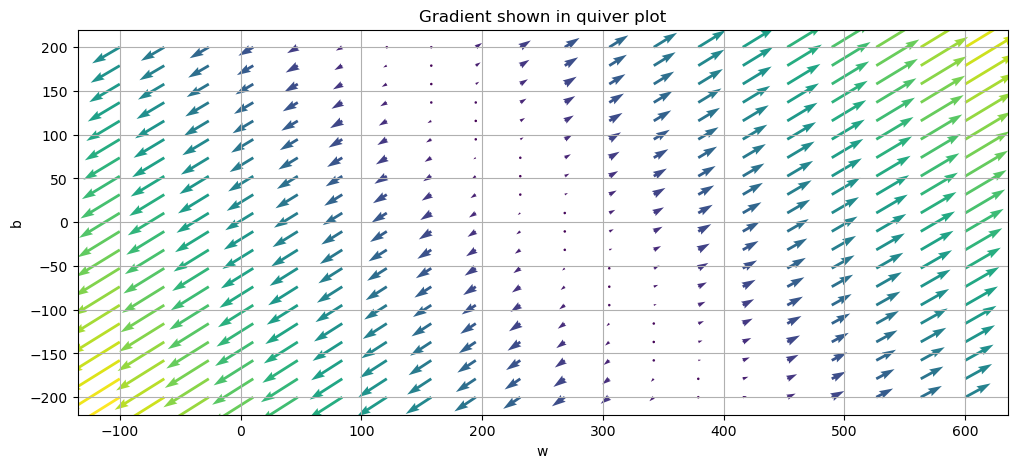

In [82]:
w_vals=np.linspace(-100,600,20)
b_vals=np.linspace(-200,200,20)

W,B=np.meshgrid(w_vals,b_vals)

DJ_DW=np.zeros(W.shape)
DJ_DB=np.zeros(B.shape)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        dj_dw, dj_db=compute_derivatives(x_train,y_train,W[i,j],B[i,j])

        DJ_DW[i,j]=dj_dw
        DJ_DB[i,j]=dj_db

plt.figure(figsize=(12,5))
# plt.subplot(1,2,2)

# np.sqrt(DJ_DW**2 + DJ_DB**2): computes the magnitude (or norm) of the gradient vector
plt.quiver(W,B,DJ_DW,DJ_DB,np.sqrt(DJ_DW**2 + DJ_DB**2), cmap='viridis')
plt.xlabel("w")
plt.ylabel("b")
plt.title("Gradient shown in quiver plot")
plt.grid(True)
plt.show()

### Cost vs Iteration plot

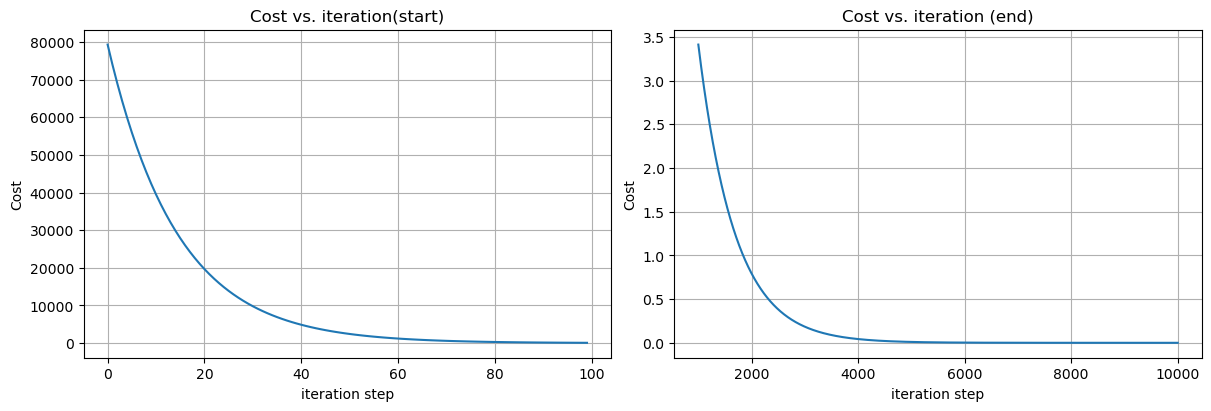

In [83]:
# plt.subplots(1, 2, ...): Creates 1 row and 2 columns of subplots — ax1 for the left plot, ax2 for the right.
# figsize=(12,4): Sets the overall figure size to be 12 inches wide and 4 inches tall.
# constrained_layout=True: Automatically adjusts spacing to prevent overlapping labels and titles.
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

# x-axis: The iteration steps (0 to 99) — implicitly assigned by Matplotlib.
# y-axis: The cost at each of those iterations (J_hist[0], J_hist[1], ..., J_hist[99]).
ax1.plot(j_hist[:100])
ax1.set_title("Cost vs. iteration(start)")
ax1.set_xlabel('iteration step')
ax1.set_ylabel('Cost')   
ax1.grid(True)

# 1000 + np.arange(len(j_hist[1000:])
# Creates an array like [0, 1, 2, ..., N], where N is the number of points after 1000.
# Shifts that range to the actual iteration numbers, i.e., [1000, 1001, 1002, ...,
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax2.set_title("Cost vs. iteration (end)")
ax2.set_xlabel('iteration step') 
ax2.set_ylabel('Cost') 
ax2.grid(True)

plt.show()

### Contour plot

You can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b). 

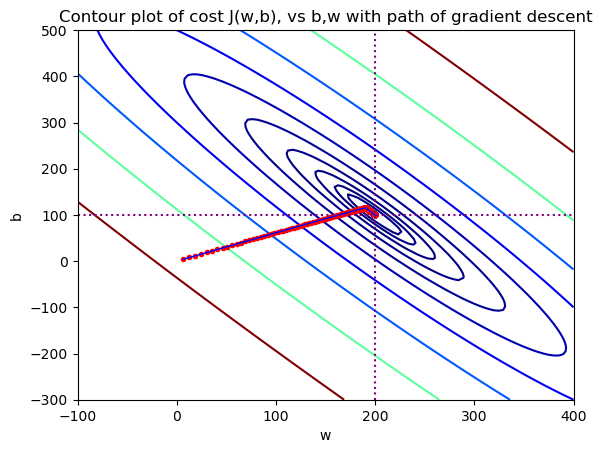

In [84]:
# Unpack parameter history
p_hist=np.array(p_hist)

w_vals=np.linspace(-100,400,100)
b_vals=np.linspace(-300,500,100)

W, B=np.meshgrid(w_vals,b_vals)

Jwb=np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Jwb[i,j]=cost_function(x_train,y_train,W[i,j],B[i,j])

# np.logspace(2, 5, 10)
# generates 10 values between: 10^2 to 10^5
# Evenly spaced on a log scale — not a linear scale.
plt.contour(W,B,Jwb,levels=np.logspace(2,5,10),cmap='jet')

# p_hist[:,0]: All the weight values (w) from the history of gradient descent.
# p_hist[:,1]: All the bias values (b) from the history.
plt.plot(p_hist[:,0], p_hist[:,1], 'ro', markersize=3)
plt.plot(p_hist[:,0], p_hist[:,1], 'b-', linewidth=1)

plt.axvline(x=w_final, color='purple', linestyle=':')
plt.axhline(y=b_final, color='purple', linestyle=':')

plt.title("Contour plot of cost J(w,b), vs b,w with path of gradient descent")
plt.xlabel("w")
plt.ylabel("b")
plt.show()


Above, the contour plot shows the $cost(w,b)$ over a range of $w$ and $b$. Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent. Here are some things to note:
- The path makes steady (monotonic) progress toward its goal.
- initial steps are much larger than the steps near the goal.

## Prediction
- Predict house price for 4080 sqft house.

In [85]:
x=4.08

ycap = np.around(w_final*x + b_final, 2)

print(f"Price for a 4080 sqft house could be ${ycap}K")

Price for a 4080 sqft house could be $916.0K
